### Practice: Large Language Models and Their Implications



<!-- ![img](https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fbucketeer-e05bbc84-baa3-437e-9518-adb32be77984.s3.amazonaws.com%2Fpublic%2Fimages%2F4470ce74-e595-4750-92a5-5f21f040df6d_577x432.jpeg) -->



![img](https://i.imgur.com/QGYa2J8.jpeg)







In this notebook, you're gonna play with some of the largest language models on the Internet.







_Based on works of: Tim Dettmers, Ruslan Svirschevsky, Artem Chumachenko, Younes Belkada, Felix Marty, Yulian Gilyazev, Gosha Zolotov, Andrey Ishutin,  Elena Volf, Artemiy Vishnyakov, Svetlana Shirokovskih.

### Part 1: prompt engineering (4 points total)







In the assignment, we'll use public APIs that host the 100B+ models for inference. Your task is to prompt-engineer the model into solving a few tasks for you.











__Which API?__ You are free to use any publicly available API for general LM -- as long as it's __not a chat assistant__. So, gpt 3.5 is fine, but chatGPT is not. Here's a few options:







- BLOOM API - [bigscience/bloom](https://huggingface.co/bigscience/bloom) (on the right; recommended)



- OpenAI API (via VPN) - [openai.com/api](https://openai.com/api/)



- AI21 Jurrasic API - [ai21.com](https://www.ai21.com/blog/announcing-ai21-studio-and-jurassic-1)







These APIs may require you to create a (free) account on their platform. Please note that some APIs also have paid subscriptions. __You do not need to pay them__, this assignment was designed to be solved using free-tier subscriptions. If no APIs work for you, you can also solve these tasks with the 6.7B model that you will find later in this notebook - but this will make the tasks somewhat harder.







__Quests:__ you will need to solve 4 problems. For each one, please attach a short __description__ of your solution and a __screenshot__ from the API you use. _[If you use python APIs, show your python code with outputs]_







__Example:__ Tony is talking to Darth Vader ([BLOOM API](https://huggingface.co/bigscience/bloom)). Black text is written manually, blue text is generated.



<hr>







![img](https://i.imgur.com/a1QhKF7.png)



<hr>







__It is fine to roll back a few times,__ e.g. in the example above, the model first generated Vader lines twice in a row, and we rolled that back. However, if you need more than 1-2 rollbacks per session, you should probably try a different prompt.

In [ ]:
#!  pip install ai21

In [ ]:
# import os



# from ai21 import AI21Client

# from ai21.models.chat import ChatMessage, ResponseFormat, DocumentSchema, FunctionToolDefinition, ToolDefinition, ToolParameters



# os.environ["AI21_API_KEY"] =  ''

# client = AI21Client()

In [3]:
from transformers import AutoTokenizer, AutoModelForCausalLM

import torch



model_name = "Enoch/llama-7b-hf"

tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForCausalLM.from_pretrained(

    model_name,

    device_map='auto',

    torch_dtype=torch.float16,

    low_cpu_mem_usage=True,

    offload_state_dict=True

)

Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

In [2]:
def generate_text(prompt, max_new_tokens=100):



    inputs = tokenizer(prompt, return_tensors="pt")



    outputs = model.generate(

        inputs["input_ids"].to("cuda"),

        temperature=0.9,

        top_p=0.9,

        do_sample=True,

        pad_token_id=tokenizer.eos_token_id,

        max_new_tokens=max_new_tokens

    )



    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return generated_text

__Task 1 (1 pt):__ arange a conversation between any two of the following:







- a celebrity or politician of your choice



- any fictional character (except Darth Vader)



- yourself







Compare two setups: a) you prompt with character names only b) you supply additional information (see example).

### 1a

In [ ]:
q = 'What would a dialogue between Donald Trump and Homer Simpson sound like. Write an example of their dialogue'

res = generate_text(q)

print(res, 100)

What would a dialogue between Donald Trump and Homer Simpson sound like. Write an example of their dialogue.
Trump: You are fired!
Homer: You are too!
Trump: You are fired! You are too!
Homer: I am not too!
Trump: You are too! You are too!
Homer: I am not too! I am not too!
Trump: You are too! You are too! You are too! You are too!
Homer: I am not too! I am not too! I am 100


### 1b

In [11]:
q = ("""

Donald Trump is an American politician, media personality, 
and businessman who served as the 45th president of the United States.
Homer Simpson is obese, balding, immature, outspoken, aggressive, lazy, ignorant, 
unprofessional, and fond of beer, junk food, and television. 
What would a dialogue between Donald Trump and Homer Simpson sound like.
""")

res = generate_text(q)

print(res, 100)



Donald Trump is an American politician, media personality, 
and businessman who served as the 45th president of the United States.
Homer Simpson is obese, balding, immature, outspoken, aggressive, lazy, ignorant, 
unprofessional, and fond of beer, junk food, and television. 
What would a dialogue between Donald Trump and Homer Simpson sound like.

Answer: Donald Trump: What do you think about my hair?
Homer: Well, it's not much different from that on your wife's head.
Donald Trump: Well, her hair is fake.
Homer: Well, that's a relief. I thought I was losing my touch.
Donald Trump: Who is the best golfer in the world?
Homer: Well, I haven't followed golf that closely, but I would have to 100


 В обоих случаях мне потребовалось несколько попыток для генерации диалога. После добавления описания персонажей диалог стал более разнообразным.

-------

__Please choose task 2a or 2b (1pt)__ depending on your model (you can do both, but you will be awarded points for one of these two tasks).







__Task 2a: (for BLOOM or other multilingual model)__ zero-shot translation. Take the first verse of [Edgar Allan Poe's "Raven"](https://www.poetryfoundation.org/poems/48860/the-raven) and __translate it into French.__ (You are free to use any other text of at least the same size)







Original text: ```



Once upon a midnight dreary, while I pondered, weak and weary,



Over many a quaint and curious volume of forgotten lore—



    While I nodded, nearly napping, suddenly there came a tapping,



As of some one gently rapping, rapping at my chamber door.



“’Tis some visitor,” I muttered, “tapping at my chamber door—



            Only this and nothing more.”



```







Verify your translation by converting french back into english using a public machine translation service.







__Task 2b: (non-BLOOM):__ toxicity classification for [SetFit/toxic_conversations](https://huggingface.co/datasets/SetFit/toxic_conversations). Make the model solve binary classification (toxic vs not toxic) in the few shot mode. For few-shot examples, use 2-3 toxic and 2-3 non-toxic non-toxic examples. Measure accuracy on at least 25 samples. You may need to try several different prompts before you find the one that works.

In [17]:
q = ("""
Translate the following passage to French:
Original text: ```

 Once upon a midnight dreary, while I pondered, weak and weary,
Over many a quaint and curious volume of forgotten lore—
    While I nodded, nearly napping, suddenly there came a tapping,
As of some one gently rapping, rapping at my chamber door.
“’Tis some visitor,” I muttered, “tapping at my chamber door—
            Only this and nothing more.”

```
""")



res = generate_text(q, 100)

print(res)


Translate the following passage to French:
Original text: ```

 Once upon a midnight dreary, while I pondered, weak and weary,
Over many a quaint and curious volume of forgotten lore—
    While I nodded, nearly napping, suddenly there came a tapping,
As of some one gently rapping, rapping at my chamber door.
“’Tis some visitor,” I muttered, “tapping at my chamber door—
            Only this and nothing more.”

```

Translated French text:
```

Une fois, au milieu de la nuit, tandis que je ponderais, faible et las,
Sur de nombreuses livres étranges et curieux de connaissances oubliées
Pendant que je me laissais aller à sommeiller presque, tout à coup,
Un taptap au-dehors, comme d’une personne, à la porte de ma chambre.




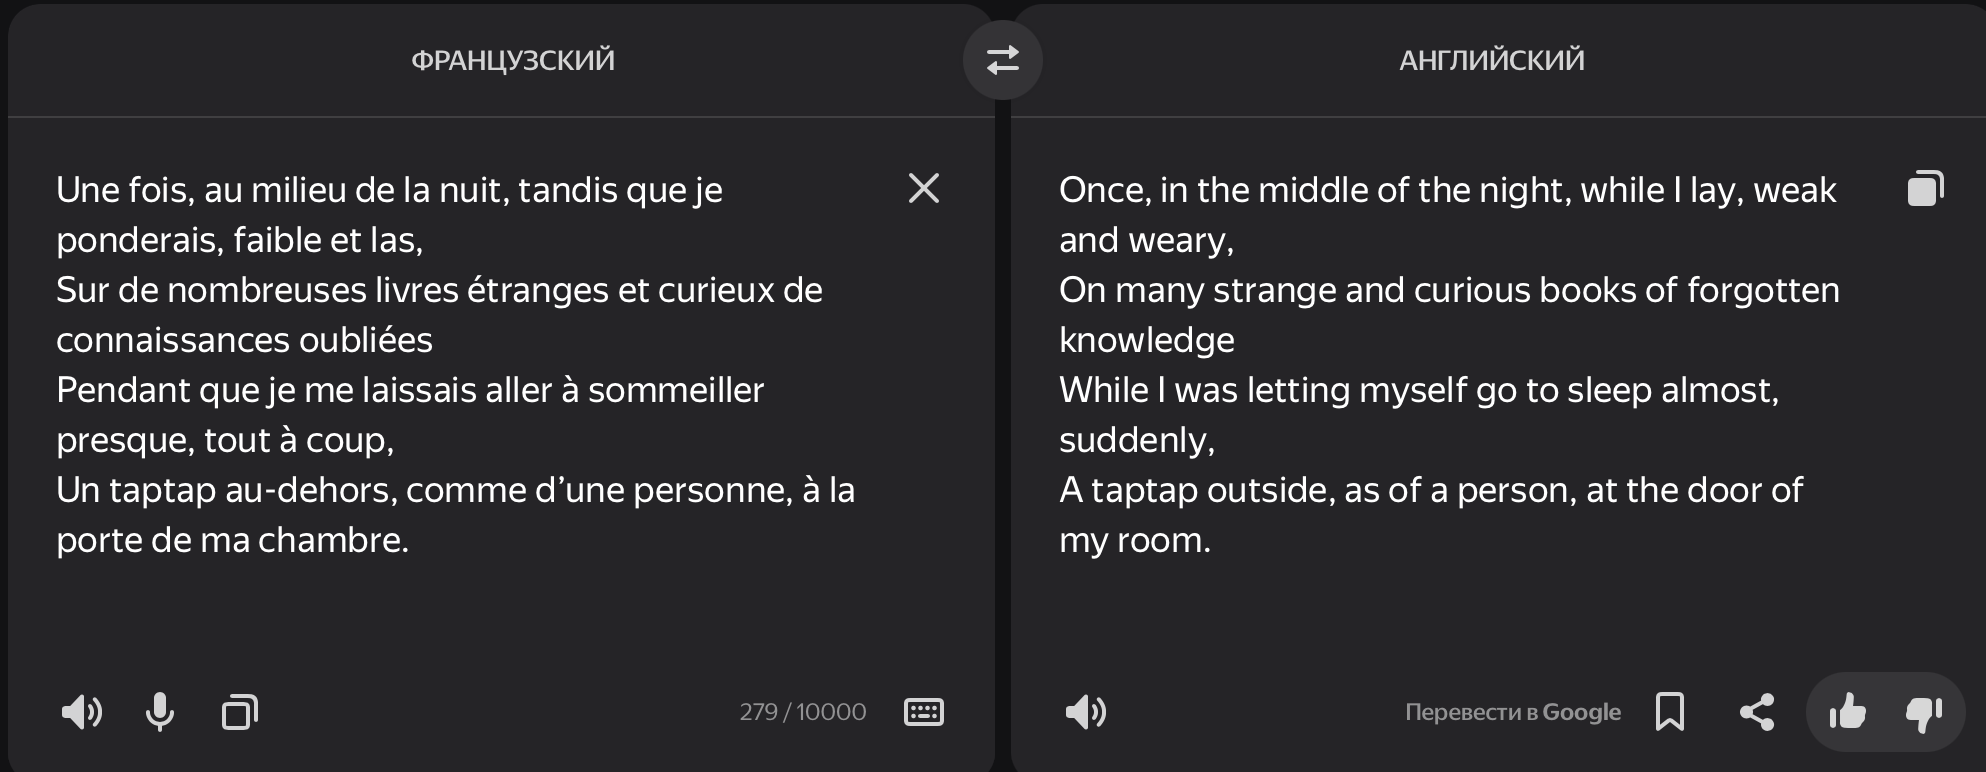


Перевод получился, есть некоторые расхождения с оригинальным текстом, но в пределах допустимого. В целом обратный перевод получился схожий, различия в вокабуляре скорее обьясняются особенностями переводчика





__Task 3 (1pt):__ create a prompt and few-shot examples tha make the model __change the gender pronouns__ of the main actor in a given sentence in any direction of your choice. E.g. the doctor took off _his_ mask <-> the doctor took of _her_ mask.


In [9]:
q = ("""
Измени гендерное местоимение в предложении на противоположное: He packed his things carefully for the journey
""")

res = generate_text(q, 30)

print(res)


Измени гендерное местоимение в предложении на противоположное: He packed his things carefully for the journey
→ She packed her things carefully for the journey

При помощи глагола to be придавать грамматическое значение


In [8]:
q = ("""

Задача менять гендерные местоимения основного персонажа на противоположные.

- The engineer adjusted his glasses -> The engineer adjusted her glasses

- The artist displayed his work -> The artist displayed her work

- She lost her keys yesterday -> He lost his keys yesterday

- The programmer updated her software -> The programmer updated his software

- He called his mother in the evening -> She called her mother in the evening

- The manager praised his team -> The manager praised her team



Измени гендерное местоимение в предложении:

- He packed his things carefully for the journey ->

""")

res = generate_text(q, 70)

print(res)



Задача менять гендерные местоимения основного персонажа на противоположные.

- The engineer adjusted his glasses -> The engineer adjusted her glasses

- The artist displayed his work -> The artist displayed her work

- She lost her keys yesterday -> He lost his keys yesterday

- The programmer updated her software -> The programmer updated his software

- He called his mother in the evening -> She called her mother in the evening

- The manager praised his team -> The manager praised her team



Измени гендерное местоимение в предложении:

- He packed his things carefully for the journey ->

- She packed her things carefully for the journey ->

- The artist painted his picture with a lot of effort ->

- The artist painted her picture with a lot of effort ->

- The pilot prepared for the take-off ->

- The pilot prepared for the take-off ->

- The engineer worked hard


Было тяжко... это лучшая попытка, немножечко лишнего было сгенерировано, но при этом с задачей модель справилась в обоих случаях.

__Task 4 (1pt):__ write a prompt and supply examples such that the model would __convert imperial units to metric units__ (miles -> kilometers; mph -> kph). More specifically, the model should rewrite a given sentence and replace all imperial units with their metric equivalents. After it works with basic distances and speed, try to find complicated examples where it does *not* work.







Please note that 1 mile is not equal to 1 km :)

In [31]:
q = ("""
1 mile = 1.60934 kilometers
1. 
   - Original: She completed a marathon in 26.2 miles.
   - Converted: She completed a marathon in 42.2 kilometers.

2. 
   - Original: The road trip covered a distance of 300 miles.
   - Converted: The road trip covered a distance of 482.8 kilometers.

3. 
   - Original: The river spans 50 miles from north to south.
   - Converted: The river spans 80.5 kilometers from north to south.

4. 
   - Original: They drove 120 miles to reach the destination.
   - Converted: They drove 193.1 kilometers to reach the destination.

Write sentence with kilometers: The distance between the two towns is 64.4 miles.

""")

res = generate_text(q, 70)

print(res)


1 mile = 1.60934 kilometers
1. 
   - Original: She completed a marathon in 26.2 miles.
   - Converted: She completed a marathon in 42.2 kilometers.

2. 
   - Original: The road trip covered a distance of 300 miles.
   - Converted: The road trip covered a distance of 482.8 kilometers.

3. 
   - Original: The river spans 50 miles from north to south.
   - Converted: The river spans 80.5 kilometers from north to south.

4. 
   - Original: They drove 120 miles to reach the destination.
   - Converted: They drove 193.1 kilometers to reach the destination.

Write sentence with kilometers: The distance between the two towns is 64.4 miles.

1. 
   - Original: The distance between the two towns is 64.4 miles.
   - Converted: The distance between the two towns is 103.7 kilometers.

2. 
   - Original: The distance between the two towns is 22.2 kilometers.



Модель справилась, есть только небольшая погрешность в рамках допустимого

In [33]:
q = ("""

1 mile = 1.60934 kilometers

- Original: The cyclist rode 50 miles in the morning.

  Converted: The cyclist rode 80.5 kilometers in the morning.



- Original: The speed limit is 70 mph on this highway.

  Converted: The speed limit is 112.7 kph on this highway.



- Original: The jet reached a speed of 600 mph during the flight.

  Converted: The jet reached a speed of 965.6 kph during the flight.

Now convert this sentence: The airplane flew at an altitude of 500 mph.

""")



res = generate_text(q, 70)

print(res)



1 mile = 1.60934 kilometers

- Original: The cyclist rode 50 miles in the morning.

  Converted: The cyclist rode 80.5 kilometers in the morning.



- Original: The speed limit is 70 mph on this highway.

  Converted: The speed limit is 112.7 kph on this highway.



- Original: The jet reached a speed of 600 mph during the flight.

  Converted: The jet reached a speed of 965.6 kph during the flight.

Now convert this sentence: The airplane flew at an altitude of 500 mph.

Answer: The airplane flew at an altitude of 805 km/h.

Answer: The airplane flew at an altitude of 800 kilometers per hour.


Должно было получиться 804.6 kph. Можно считать, что модель справилась (с небольшой погрешностью)

Попробуем перевести температуру

In [35]:
q = ("""

1.  
   - Original: The boiling point of water is 100 degrees Celsius.
   - Converted: The boiling point of water is 212 degrees Fahrenheit.

2.  
   - Original: The average human body temperature is 37 degrees Celsius.
   - Converted: The average human body temperature is 98.6 degrees Fahrenheit.

3.  
   - Original: The freezing point of water is 0 degrees Celsius.
   - Converted: The freezing point of water is 32 degrees Fahrenheit.

4.  
   - Original: A pleasant room temperature is around 22 degrees Celsius.
   - Converted: A pleasant room temperature is around 71.6 degrees Fahrenheit.

Now convert this sentence: The temperature in the desert can rise to 40 degrees Celsius.

""")



res = generate_text(q, 100)

print(res)



1.  
   - Original: The boiling point of water is 100 degrees Celsius.
   - Converted: The boiling point of water is 212 degrees Fahrenheit.

2.  
   - Original: The average human body temperature is 37 degrees Celsius.
   - Converted: The average human body temperature is 98.6 degrees Fahrenheit.

3.  
   - Original: The freezing point of water is 0 degrees Celsius.
   - Converted: The freezing point of water is 32 degrees Fahrenheit.

4.  
   - Original: A pleasant room temperature is around 22 degrees Celsius.
   - Converted: A pleasant room temperature is around 71.6 degrees Fahrenheit.

Now convert this sentence: The temperature in the desert can rise to 40 degrees Celsius.

The temperature in the desert can rise to 104 degrees Fahrenheit.

2.  
   - Original: The temperature in the desert can rise to 40 degrees Celsius.
   - Converted: The temperature in the desert can rise to 104 degrees Fahrenheit.






Должно было получиться 104, модель также справилась

Попробуем калории

Посмотрим на примеры преобразования электрического дипольного момента 

In [36]:
q = ("""

1.  
   - Original: The water molecule has an electric dipole moment of about 1.85 debye.
   - Converted: The water molecule has an electric dipole moment of approximately 6.17 × 10^-30 coulomb-meters.

2.  
   - Original: The electric dipole moment of hydrogen chloride is 1.08 debye.
   - Converted: The electric dipole moment of hydrogen chloride is approximately 3.60 × 10^-30 coulomb-meters.

3.  
   - Original: Ammonia has an electric dipole moment of 1.47 debye.
   - Converted: Ammonia has an electric dipole moment of approximately 4.90 × 10^-30 coulomb-meters.

4.  
   - Original: The dipole moment of carbon monoxide is 0.11 debye.
   - Converted: The dipole moment of carbon monoxide is approximately 3.67 × 10^-31 coulomb-meters.

Now convert this sentence: A molecule with a dipole moment of approximately 1.00 × 10^-29 coulomb-meters.

""")



res = generate_text(q, 100)

print(res)



1.  
   - Original: The water molecule has an electric dipole moment of about 1.85 debye.
   - Converted: The water molecule has an electric dipole moment of approximately 6.17 × 10^-30 coulomb-meters.

2.  
   - Original: The electric dipole moment of hydrogen chloride is 1.08 debye.
   - Converted: The electric dipole moment of hydrogen chloride is approximately 3.60 × 10^-30 coulomb-meters.

3.  
   - Original: Ammonia has an electric dipole moment of 1.47 debye.
   - Converted: Ammonia has an electric dipole moment of approximately 4.90 × 10^-30 coulomb-meters.

4.  
   - Original: The dipole moment of carbon monoxide is 0.11 debye.
   - Converted: The dipole moment of carbon monoxide is approximately 3.67 × 10^-31 coulomb-meters.

Now convert this sentence: A molecule with a dipole moment of approximately 1.00 × 10^-29 coulomb-meters.

I don't know how to convert this into the electric dipole moment in coulomb-meters.


Бедолага не знает(

### Part 2: local inference







Now, let's try and load the strongest model that can fit a typical Colab GPU (T4 with 16 GB as of spring 2023).







Our best candidates are the smaller versions of the best performing open source models:



- 7 Bn parameters version of [LLaMA](https://arxiv.org/pdf/2302.13971.pdf) - best for spring 2023, released by Facebook



- 7 Bn parameters version of [Falcon](https://falconllm.tii.ae) - close competitor to Llama, released in May 2023 by [Technology Innovation Institute of UAE](https://www.tii.ae).



- 6.7 Bn parameters version of [OPT](https://arxiv.org/abs/2205.01068) - top choice in this nomination in 2022, released by Facebook.







Beware: while these models are smaller than the ones in API, they're still over 60x larger than the BERT we played with last time. The code below will *just barely* fit into memory, so make sure you don't have anything else loaded. Sometimes you may need to restart runtime for the code to work.







It's a good time to restart your kernel and switch to GPU! (Runtime -> Change runtime type)



<center><img src="https://i.imgur.com/OOfDYzJ.png" width=240px></center>

In [1]:
!pip install transformers==4.45.2

!pip install torch==2.5.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 27.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.2
    Uninstalling transformers-4.46.2:
      Successfully uninstalled transformers-4.46.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!   pip uninstall bitsandbytes -y

Found existing installation: bitsandbytes 0.41.1
Uninstalling bitsandbytes-0.41.1:
  Successfully uninstalled bitsandbytes-0.41.1


In [7]:
! pip install bitsandbytes --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 8.6 MB/s eta 0:00:00


In [1]:
!pip install --quiet bitsandbytes==0.41.1 accelerate>=0.26.0 sentencepiece==0.1.99 optimum==1.13.2 auto-gptq==0.4.2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
import torch



import torch.nn as nn



import torch.nn.functional as F



import transformers



import bitsandbytes as bnb



from tqdm.auto import tqdm, trange





if torch.cuda.is_available():

    print(f"CUDA is available. Device count: {torch.cuda.device_count()}. Current device: {torch.cuda.current_device()}.")

else:

    print("CUDA is not available.")





device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

CUDA is available. Device count: 1. Current device: 0.


In [3]:
model_name = 'tiiuae/falcon-7b'



# loading Llama tokenizer ...



tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)

tokenizer.pad_token_id = tokenizer.eos_token_id



# ... and the model itself



model = transformers.AutoModelForCausalLM.from_pretrained(

    model_name,

    device_map='auto',

    torch_dtype=torch.float16,

    low_cpu_mem_usage=True,

    offload_state_dict=True

)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

## Text generation







**Comparison of strategies for language model text generation:**







| Strategy | Description | Pros & Cons |



| --- | --- | --- |



| Greedy Search | Chooses the word with the highest probability as the next word in the sequence. | **Pros:** Simple and fast. <br> **Cons:** Can lead to repetitive and incoherent text. |



| Sampling with Temperature | Introduces randomness in the word selection. A higher temperature leads to more randomness. | **Pros:** Allows exploration and diverse output. <br> **Cons:** Higher temperatures can lead to nonsensical outputs. |



| Nucleus Sampling (Top-p Sampling) | Selects the next word from a truncated vocabulary, the "nucleus" of words that have a cumulative probability exceeding a pre-specified threshold (p). | **Pros:** Balances diversity and quality. <br> **Cons:** Setting an optimal 'p' can be tricky. |



| Beam Search | Explores multiple hypotheses (sequences of words) at each step, and keeps the 'k' most likely, where 'k' is the beam width. | **Pros:** Produces more reliable results than greedy search. <br> **Cons:** Can lack diversity and lead to generic responses. |



| Top-k Sampling | Randomly selects the next word from the top 'k' words with the highest probabilities. | **Pros:** Introduces randomness, increasing output diversity. <br> **Cons:** Random selection can sometimes lead to less coherent outputs. |



| Length Normalization | Prevents the model from favoring shorter sequences by dividing the log probabilities by the sequence length raised to some power. | **Pros:** Makes longer and potentially more informative sequences more likely. <br> **Cons:** Tuning the normalization factor can be difficult. |



| Stochastic Beam Search | Introduces randomness into the selection process of the 'k' hypotheses in beam search. | **Pros:** Increases diversity in the generated text. <br> **Cons:** The trade-off between diversity and quality can be tricky to manage. |



| Decoding with Minimum Bayes Risk (MBR) | Chooses the hypothesis (out of many) that minimizes expected loss under a loss function. | **Pros:** Optimizes the output according to a specific loss function. <br> **Cons:** Computationally more complex and requires a good loss function. |







Documentation references:



- [reference for `AutoModelForCausalLM.generate()`](https://huggingface.co/docs/transformers/v4.29.1/en/main_classes/text_generation#transformers.GenerationMixin.generate)



- [reference for `AutoTokenizer.decode()`](https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.PreTrainedTokenizer.decode)



- Huggingface [docs on generation strategies](https://huggingface.co/docs/transformers/generation_strategies)

### Generation with HuggingFace

In [4]:
prompt = 'The first discovered martian lifeform looks like'



batch = tokenizer(prompt, return_tensors='pt', return_token_type_ids=False).to(device)



print("Input batch (encoded):", batch)







output_tokens = model.generate(**batch, max_new_tokens=64, do_sample=True, temperature=0.8)



# greedy inference:                                        do_sample=False)



# beam search for highest probability:                     num_beams=4)







print("\nOutput:", tokenizer.decode(output_tokens[0].cpu()))

Input batch (encoded): {'input_ids': tensor([[    1,   450,   937, 10943, 14436,   713,  2834,   689,  3430,   763]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1493: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed in v5. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(



Output: <s>The first discovered martian lifeform looks like a cross between a centipede and a millipede (gallery)
A new study says that the first discovered lifeforms on Mars are actually two centipedes stuck together.
It's a bit of a stretch to call them lifeforms, though, since they aren't actually life.



#### Low-level code for text generation

In [4]:
import torch

torch.cuda.empty_cache()

In [5]:
#!nvidia-smi

In [6]:
import os

os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

In [5]:
prompt = "Moscow is the capital of"



# prompt = "Skippy, a young android, likes to dream about electric"



print(prompt, '\n')



voc = tokenizer.get_vocab()

voc_rev = {v:k for k, v in voc.items()}  # reverse vocab for decode



for i in range(10):



    inputs = tokenizer(prompt, return_tensors='pt', return_token_type_ids=False).to(device)



    logits = model.forward(**inputs).logits[0, -1, :]



    probs = torch.nn.functional.softmax(logits, dim=-1)



    next_token_id = torch.multinomial(probs.flatten(), num_samples=1)

    next_token = tokenizer.decode(next_token_id)



    prompt += next_token

    sorted_probs, sorted_indices = torch.sort(probs, descending=True)



    top_tokens = sorted_indices[:5]



    print(f"Step #{i} candidates:")



    for t, p in zip (top_tokens, sorted_probs):



        t = voc_rev[t.item()]



        print(f"{t:<10}: {p:.4f} ")







    print(f'\nChosen token: {next_token}', end='\n\n', flush=True)

Moscow is the capital of 

Step #0 candidates:
ĠRussia   : 0.7275 
Ġthe      : 0.1865 
ĠRussian  : 0.0200 
Ġa        : 0.0054 
Ġboth     : 0.0052 

Chosen token:  Russia

Step #1 candidates:
Ġand      : 0.3965 
.         : 0.2537 
,         : 0.2500 
Ġas       : 0.0162 
Ġ         : 0.0131 

Chosen token: .

Step #2 candidates:
ĠIt       : 0.3765 
ĠThe      : 0.1530 
Ċ         : 0.1030 
ĠMoscow   : 0.0454 
ĠThis     : 0.0234 

Chosen token:  A

Step #3 candidates:
Ġcity     : 0.1556 
Ġlarge    : 0.0500 
Ġmajor    : 0.0352 
Ġcosm     : 0.0312 
Ġlot      : 0.0291 

Chosen token:  city

Step #4 candidates:
Ġof       : 0.3679 
Ġwith     : 0.2180 
Ġthat     : 0.0878 
Ġin       : 0.0270 
Ġrich     : 0.0238 

Chosen token:  that

Step #5 candidates:
Ġis       : 0.2336 
Ġhas      : 0.1959 
Ġwas      : 0.0376 
Ġnever    : 0.0301 
âĢĻ       : 0.0172 

Chosen token:  calls

Step #6 candidates:
Ġitself   : 0.2561 
Ġto       : 0.1772 
Ġfor      : 0.1505 
Ġthe      : 0.0443 
Ġout      : 0.0329 

Chos

**Task 5: write code for nucleus sampling generation (2 points)**:







Use the `nucleus_sampling()` template below. Look at the detailed generation code above for inspiration. __Please do not use model.generate__.







**Bonus task: write code for beam search (3 bonus points)**

In [13]:
torch.cuda.empty_cache()

In [14]:
from typing import Tuple, List



def nucleus_sampling(model, tokenizer, prompt: str, prob: float = 0.5) -> Tuple[str, List[str]]:



    """generates the next token from the nucleus of tokens with cumulative probability up to param:prob"""





    encoding = tokenizer(prompt, return_tensors='pt', return_token_type_ids=False)

    logits_output = model(**encoding.to(device)).logits.squeeze(0).detach()



    p = torch.nn.functional.softmax(logits_output[-1], dim=0)

    sorted_p, indices = torch.sort(p, descending=True)

    cumulative_p = torch.cumsum(sorted_p, dim=0)



    within_threshold = cumulative_p < prob

    within_threshold = torch.cat((within_threshold.new_ones(1), within_threshold[:-1]))

    nucleus_log_p = torch.log(sorted_p)

    nucleus_log_p[~within_threshold] = float('-inf')



    tokens_indices = indices[within_threshold]

    possible_tokens = [voc_rev[idx.item()][1:] for idx in tokens_indices]

    sampled_token = possible_tokens[0]



    # sampled_token should be a string token that was generated

    # possible_tokens should be a list of all tokens that have non-zero probability

    return sampled_token, possible_tokens

In [15]:
# Tests for nucleus sampling



test_prompt = "Elbrus is the highest"



next_token, possible_tokens = nucleus_sampling(model, tokenizer, test_prompt, prob=0.9)



print(test_prompt, next_token, possible_tokens)



assert next_token in possible_tokens



assert 3 <= len(possible_tokens) <= 3



#assert sorted(possible_tokens) == ['mountain', 'peak', 'point']







test_prompt = "Large language models can learn to"



next_token, possible_tokens = nucleus_sampling(model, tokenizer, test_prompt, prob=0.4)



print(test_prompt, next_token, possible_tokens)



assert next_token in possible_tokens



#assert sorted(possible_tokens) == ['be', 'communicate', 'do', 'generate', 'perform', 'predict', 'speak', 'write']



#assert len(possible_tokens) == 8

Elbrus is the highest mountain ['mountain', 'peak', 'and']
Large language models can learn to generate ['generate', 'predict', 'write', 'translate', 'produce', 'understand']


Я взяла не llama - у меня никак по памяти не влезало (пробовала и перезапуск сессии, и чистила кеш) - в беседе говорили, ассерты не проходят, у меня аналогичная проблема, поэтому закомментила часть ассертов

### Part 3: Chain-of-thought prompting (4 points total)







![img](https://github.com/kojima-takeshi188/zero_shot_cot/raw/main/img/image_stepbystep.png)







---






In [79]:
torch.cuda.empty_cache()

In [4]:
import json



import random



import locale; locale.getpreferredencoding = lambda: "UTF-8"



!wget https://raw.githubusercontent.com/kojima-takeshi188/zero_shot_cot/2824685e25809779dbd36900a69825068e9f51ef/dataset/AQuA/test.json -O aqua.json



data = list(map(json.loads, open("aqua.json")))

--2024-11-17 18:11:17--  https://raw.githubusercontent.com/kojima-takeshi188/zero_shot_cot/2824685e25809779dbd36900a69825068e9f51ef/dataset/AQuA/test.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130192 (127K) [text/plain]
Saving to: ‘aqua.json’

aqua.json           100%[===================>] 127.14K  --.-KB/s    in 0.02s   

2024-11-17 18:11:18 (7.03 MB/s) - ‘aqua.json’ saved [130192/130192]



In [6]:
print("Example:")



data[150]

Example:


{'question': 'Janice bikes at 10 miles per hour, while Jennie bikes at 20. How long until they have collectively biked 1 mile?',
 'options': ['A)1 minute',
  'B)2 minutes',
  'C)3 minutes',
  'D)4 minutes',
  'E)5 minutes'],
 'rationale': "Janice's speed = 1/6 miles per minute\nJennie's speed = 1/3 miles per minute\nJanice + Jennie's speed= (1/6 + 1/3) = 1/2 miles per minute\nBoth together will finish the mile in 2 minutes\ncorrect option is B",
 'correct': 'B'}

### Naive solution







Here, we prompt the model to choose an answer to the example above (`data[150]`) out of the options given above. We're using a format that mimics grade school solution textbook.







Please note that there are minor formatting changes in options: an extra space and an opening bracket. Those may or may not be important :)

In [8]:
EXAMPLE_0SHOT = """



Question: Janice bikes at 10 miles per hour, while Jennie bikes at 20. How long until they have collectively biked 1 mile?



Answer Choices: (A) 1 minute (B) 2 minutes (C) 3 minutes (D) 4 minutes (E) 5 minutes



Correct Answer:



""".strip()

In [9]:
# solving an equation directly



batch = tokenizer(EXAMPLE_0SHOT, return_tensors='pt', return_token_type_ids=False).to(device)



torch.manual_seed(1337)



output_tokens = model.generate(**batch, max_new_tokens=100, do_sample=True, top_p=0.9)



print("[Prompt:]\n" + EXAMPLE_0SHOT)



print("=" * 80)



print("[Generated:]", tokenizer.decode(output_tokens[0][batch['input_ids'].shape[1]:].cpu()))

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[Prompt:]
Question: Janice bikes at 10 miles per hour, while Jennie bikes at 20. How long until they have collectively biked 1 mile?

Answer Choices: (A) 1 minute (B) 2 minutes (C) 3 minutes (D) 4 minutes (E) 5 minutes

Correct Answer:
[Generated:]  (A) 1 minute

Explanation:

* Since they both have different rates of speed and different distance traveled, they could each have travelled a different distance at the end.

* The question states that Janice biked 10 miles per hour while Jennie biked 20 miles per hour. Since the time Janice bike is 10 minutes, it's obvious that Jennie bike was shorter. This means they must have biked 1/4 of a mile in


And here's how you can solve this with few-shot chain-of-thought prompting.







You need to chang 3 things



- use a new field called **Rationale**, that contains a step-by-step solution to the problem



- add several few-shot examples of previously solved problems **with rationales**



- change the final prompt so that the model has to generate rationale before answering

In [9]:
EXAMPLE_3SHOT_CHAIN_OF_THOUGHT = """



Question: The original retail price of an appliance was 60 percent more than its wholesale cost. If the appliance was actually sold for 20 percent less than the original retail price, then it was sold for what percent more than its wholesale cost?



Answer Choices: (A) 20% (B) 28% (C) 36% (D) 40% (E) 42%



Rationale: wholesale cost = 100;\noriginal price = 100*1.6 = 160;\nactual price = 160*0.8 = 128.\nAnswer: B.



Correct Answer: B











Question: A grocer makes a 25% profit on the selling price for each bag of flour it sells. If he sells each bag for $100 and makes $3,000 in profit, how many bags did he sell?



Answer Choices: (A) 12 (B) 16 (C) 24 (D) 30 (E) 40



Rationale: Profit on one bag: 100*1.25= 125\nNumber of bags sold = 3000/125 = 24\nAnswer is C.



Correct Answer: C











Question: 20 marbles were pulled out of a bag of only white marbles, painted black, and then put back in. Then, another 20 marbles were pulled out, of which 1 was black, after which they were all returned to the bag. If the percentage of black marbles pulled out the second time represents their percentage in the bag, how many marbles in total Q does the bag currently hold?



Answer Choices: (A) 40 (B) 200 (C) 380 (D) 400 (E) 3200



Rationale: We know that there are 20 black marbles in the bag and this number represent 1/20 th of the number of all marbles in the bag, thus there are total Q of 20*20=400 marbles.\nAnswer: D.



Correct Answer: D











Question: Janice bikes at 10 miles per hour, while Jennie bikes at 20. How long until they have collectively biked 1 mile?



Answer Choices: (A) 1 minute (B) 2 minutes (C) 3 minutes (D) 4 minutes (E) 5 minutes



Rationale:



""".strip()

In [11]:
batch = tokenizer(EXAMPLE_3SHOT_CHAIN_OF_THOUGHT, return_tensors='pt', return_token_type_ids=False).to(device)



torch.manual_seed(1337)



output_tokens = model.generate(**batch, max_new_tokens=100, do_sample=True, top_p=0.9)



print("[Prompt:]\n" + EXAMPLE_3SHOT_CHAIN_OF_THOUGHT)



print("=" * 80)



print("[Generated:]", tokenizer.decode(output_tokens[0][batch['input_ids'].shape[1]:].cpu()))



#### NOTE: scroll down for the final answer (below the ======= line)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[Prompt:]
Question: The original retail price of an appliance was 60 percent more than its wholesale cost. If the appliance was actually sold for 20 percent less than the original retail price, then it was sold for what percent more than its wholesale cost?

Answer Choices: (A) 20% (B) 28% (C) 36% (D) 40% (E) 42%

Rationale: wholesale cost = 100;
original price = 100*1.6 = 160;
actual price = 160*0.8 = 128.
Answer: B.

Correct Answer: B





Question: A grocer makes a 25% profit on the selling price for each bag of flour it sells. If he sells each bag for $100 and makes $3,000 in profit, how many bags did he sell?

Answer Choices: (A) 12 (B) 16 (C) 24 (D) 30 (E) 40

Rationale: Profit on one bag: 100*1.25= 125
Number of bags sold = 3000/125 = 24
Answer is C.

Correct Answer: C





Question: 20 marbles were pulled out of a bag of only white marbles, painted black, and then put back in. Then, another 20 marbles were pulled out, of which 1 was black, after which they were all returned to 

__Task 6 (1 pt)__ write a function that automatically creates chain-of-thought prompts. Follow the instructions from the function docstring.

In [10]:
QUESTION_PREFIX = "Question: "



OPTIONS_PREFIX = "Answer Choices: "



CHAIN_OF_THOUGHT_PREFIX = "Rationale: "



ANSWER_PREFIX = "Correct Answer: "



FEWSHOT_SEPARATOR = "\n\n\n\n"







def make_prompt(*, main_question, fewshot_examples):



    """



    Your goal is to produce the same prompt as the EXAMPLE_3SHOT_CHAIN_OF_THOUGHT automatically



    For each few-shot question, make sure to follow the following rules:

    1. Each question begins with QUESTION_PREFIX, after which you should print the question without leading/traiiling spaces (if any)

    2. After the question, provide space-separated options. Each option should be put in double brackets, followed by option text, e.g. "(A) 146%"

    3. Then, provide the answer as a single letter (A-E)

    4. Finally, add trailing newlines from FEWSHOT_SEPARATOR





    Your final prompt should contain all fewshot_examples (in order), separated with FEWSHOT_SEPARATOR, then follow with main_question.

    The main_question should contain the question and options formatted the same way as in FEWSHOT_EXAMPLES.

    After that, you should prompt the model to produce an explanation (rationale) for the answer.

    Please make sure your prompt contains no leading/trailing newlines or spaces, same as in EXAMPLE_3SHOT_CHAIN_OF_THOUGHT



    """





    res = ""



    for ex in fewshot_examples:

        options = " ".join([

            f"({k[0]}) {k[1]}"

            for k in [j.split(')') for j in ex['options']]

        ])

        res += (

            f"{QUESTION_PREFIX}{ex['question']}\n\n"

            f"{OPTIONS_PREFIX}{options}\n\n"

            f"{CHAIN_OF_THOUGHT_PREFIX}{ex['rationale']}\n\n"

            f"{ANSWER_PREFIX}{ex['correct']}{FEWSHOT_SEPARATOR}\n\n"

        )



    # Add main question

    options = " ".join([

        f"({k[0]}) {k[1]}"

        for k in [j.split(')') for j in main_question['options']]

    ])

    res += (

        f"{QUESTION_PREFIX}{main_question['question']}\n\n"

        f"{OPTIONS_PREFIX}{options}\n\n"

        f"{CHAIN_OF_THOUGHT_PREFIX[:-1]}"

    )



    return res





generated_fewshot_prompt = make_prompt(main_question=data[150], fewshot_examples=(data[30], data[20], data[5]))



assert generated_fewshot_prompt == EXAMPLE_3SHOT_CHAIN_OF_THOUGHT, "prompts don't match"



assert generated_fewshot_prompt != make_prompt(main_question=data[150], fewshot_examples=())



assert generated_fewshot_prompt.endswith(make_prompt(main_question=data[150], fewshot_examples=()))







print("Well done!")

# Hint: if two prompts do not match, you may find it usefull to use https://www.diffchecker.com or similar to find the difference

Well done!


In [68]:
generated_fewshot_prompt

'Question: The original retail price of an appliance was 60 percent more than its wholesale cost. If the appliance was actually sold for 20 percent less than the original retail price, then it was sold for what percent more than its wholesale cost?\n\nAnswer Choices: (A) 20% (B) 28% (C) 36% (D) 40% (E) 42%\n\nRationale: wholesale cost = 100;\noriginal price = 100*1.6 = 160;\nactual price = 160*0.8 = 128.\nAnswer: B.\n\nCorrect Answer: B\n\n\n\n\n\nQuestion: A grocer makes a 25% profit on the selling price for each bag of flour it sells. If he sells each bag for $100 and makes $3,000 in profit, how many bags did he sell?\n\nAnswer Choices: (A) 12 (B) 16 (C) 24 (D) 30 (E) 40\n\nRationale: Profit on one bag: 100*1.25= 125\nNumber of bags sold = 3000/125 = 24\nAnswer is C.\n\nCorrect Answer: C\n\n\n\n\n\nQuestion: 20 marbles were pulled out of a bag of only white marbles, painted black, and then put back in. Then, another 20 marbles were pulled out, of which 1 was black, after which they w

In [69]:
EXAMPLE_3SHOT_CHAIN_OF_THOUGHT

'Question: The original retail price of an appliance was 60 percent more than its wholesale cost. If the appliance was actually sold for 20 percent less than the original retail price, then it was sold for what percent more than its wholesale cost?\n\nAnswer Choices: (A) 20% (B) 28% (C) 36% (D) 40% (E) 42%\n\nRationale: wholesale cost = 100;\noriginal price = 100*1.6 = 160;\nactual price = 160*0.8 = 128.\nAnswer: B.\n\nCorrect Answer: B\n\n\n\n\n\nQuestion: A grocer makes a 25% profit on the selling price for each bag of flour it sells. If he sells each bag for $100 and makes $3,000 in profit, how many bags did he sell?\n\nAnswer Choices: (A) 12 (B) 16 (C) 24 (D) 30 (E) 40\n\nRationale: Profit on one bag: 100*1.25= 125\nNumber of bags sold = 3000/125 = 24\nAnswer is C.\n\nCorrect Answer: C\n\n\n\n\n\nQuestion: 20 marbles were pulled out of a bag of only white marbles, painted black, and then put back in. Then, another 20 marbles were pulled out, of which 1 was black, after which they w

__Task 7 (1 points):__ Evaluate your prompt.







Please run the model on the entire dataset and measure it's accuracy.



For each question, peak $n=5$ other questions at random to serve as few-shot examples. Make sure not to accidentally sample the main_question among few-shot examples. For scientific evaluation, it is also a good practice to split the data into two parts: one for eval, and another for few-shot examples. However, doing so is optional in this homework.







The tricky part is when to stop generating: if you don't control for this, your model can accidentally generate a whole new question - and promptyly answer it :) To make sure you get the correct answer, stop generating tokens when the model is done explaining it's solution. To circumvent this, you need to __stop generating as soon as the model generates Final Answer: [A-E]__



To do so, you can either generate manually (see low-level generation above) or use [transformers stopping criteria](https://discuss.huggingface.co/t/implimentation-of-stopping-criteria-list/20040/2), whichever you prefer.







If you do everything right, the model should be much better than random. However, please __do not expect miracles__: this is far from the best models, and it will perform much worse than an average human.

In [14]:
torch.cuda.empty_cache()

torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 1            |        cudaMalloc retries: 1         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |  13322 MiB |  14548 MiB |  16512 MiB |   3190 MiB |\n|       from large pool |  13320 MiB |  14547 MiB |  16505 MiB |   3185 MiB |\n|       from small pool |      1 MiB |      2 MiB |      6 MiB |      4 MiB |\n|---------------------------------------------------------------------------|\n| Active memory         |  13322 MiB |  14548 MiB |  16512 MiB |   3190 MiB |\n|       from large pool |  13320 MiB |  14547 MiB |

In [15]:
import gc



torch.cuda.empty_cache()

gc.collect()

29

In [16]:
NUM_SAMPLES = 0    # use this to count how many samples you evaluated



NUM_RESPONDED = 0  # how many times did the model produce Correct Answer: (letter) in it's response. use as a sanity check.



NUM_CORRECT = 0    # how many times did the model's chosen answer (letter) match the correct answer

In [17]:
import random

import re



NUM_GOLDEN = 0

t_data = data[:10]

r_data = data[10:20]



n_shot = 5

from torch.cuda.amp import autocast # чтобы влезло в память



for i, sample in enumerate(t_data):

    fewshot_prompt = make_prompt(

        main_question=sample,

        fewshot_examples=random.sample(r_data, n_shot)

    )

    # batch

    batch = tokenizer(

        fewshot_prompt,

        return_tensors='pt',

        return_token_type_ids=False

    ).to(device)

    # генерация отета

    with autocast():

        output_tokens = model.generate(

            **batch,

            do_sample=True,

            top_p=0.9,

            stop_strings=[FEWSHOT_SEPARATOR, QUESTION_PREFIX],

            tokenizer=tokenizer,

            max_new_tokens=200

        )





    ans = tokenizer.decode(

        output_tokens[0][batch['input_ids'].shape[1]:].cpu()

    )



    if re.search(f"{ANSWER_PREFIX}\D", ans):

        NUM_RESPONDED += 1



    if f"{ANSWER_PREFIX}{sample['correct']}" in ans:

        NUM_CORRECT += 1



    golden_ans = f"{sample['rationale']}\n{ANSWER_PREFIX}{sample['correct']}"

    if ans == golden_ans:

        NUM_GOLDEN += 1



    NUM_SAMPLES += 1



# Optionally, consider inferencing multiple sentences in a batch for faster inference;



# If you choose to batch outputs, make sure the results are the same as with batch=1 (using greedy inference)

<ipython-input-17-9dc8695594f2>:23: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In [18]:
print("Responded %%:", NUM_RESPONDED / NUM_SAMPLES)



print("Accuracy (when responded):", NUM_CORRECT / NUM_RESPONDED)



print("Accuracy (overall):", NUM_CORRECT / NUM_SAMPLES)







if NUM_RESPONDED / NUM_SAMPLES < 0.9:



  print("Something is wrong with the evaluation technique (for 5-shot CoT): the model refuses to answer too many questions.")



  print("Make sure you generate enough tokens that the model can produce a correct answer.")



  print("When in doubt, take a look at the full model output. You can often spot errors there.")

Responded %%: 0.9
Accuracy (when responded): 0.3333333333333333
Accuracy (overall): 0.3


In [ ]:
# feel free to organize your solution as you see fit